<a href="https://colab.research.google.com/github/IqbalLx/Coronavirus-in-Indonesia-Analysis/blob/master/Coronavirus_in_Indonesia_Analysis_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing the Dataset


In [1]:
from google.colab import files
files = files.upload() #Data from kawalcovid19.id

Saving Kasus Harian 21 Apr.csv to Kasus Harian 21 Apr.csv


In [0]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import datetime
from scipy.integrate import odeint
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [3]:
filename = [key for key in files.keys()][0]
print(filename)

Kasus Harian 21 Apr.csv


In [4]:
df = pd.read_csv(filename)
df.head()

,DT,Kasus (Kumulatif),Kasus Baru,Sembuh (baru),Meninggal (baru)
0,2020-03-02 00:00:00,2,2.0,NaN,NaN
1,2020-03-03 00:00:00,2,NaN,NaN,NaN
2,2020-03-04 00:00:00,2,NaN,NaN,NaN
3,2020-03-05 00:00:00,2,NaN,NaN,NaN
4,2020-03-06 00:00:00,4,2.0,NaN,NaN


In [5]:
df = df.fillna(0)
df.head()

,DT,Kasus (Kumulatif),Kasus Baru,Sembuh (baru),Meninggal (baru)
0,2020-03-02 00:00:00,2,2.0,0.0,0.0
1,2020-03-03 00:00:00,2,0.0,0.0,0.0
2,2020-03-04 00:00:00,2,0.0,0.0,0.0
3,2020-03-05 00:00:00,2,0.0,0.0,0.0
4,2020-03-06 00:00:00,4,2.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DT                 51 non-null     object 
 1   Kasus (Kumulatif)  51 non-null     int64  
 2   Kasus Baru         51 non-null     float64
 3   Sembuh (baru)      51 non-null     float64
 4   Meninggal (baru)   51 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.1+ KB


In [7]:
df.DT = df.DT.str[:10]
df.head()

,DT,Kasus (Kumulatif),Kasus Baru,Sembuh (baru),Meninggal (baru)
0,2020-03-02,2,2.0,0.0,0.0
1,2020-03-03,2,0.0,0.0,0.0
2,2020-03-04,2,0.0,0.0,0.0
3,2020-03-05,2,0.0,0.0,0.0
4,2020-03-06,4,2.0,0.0,0.0


In [0]:
df.DT = pd.to_datetime(df.DT, format="%Y-%m-%d")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DT                 51 non-null     datetime64[ns]
 1   Kasus (Kumulatif)  51 non-null     int64         
 2   Kasus Baru         51 non-null     float64       
 3   Sembuh (baru)      51 non-null     float64       
 4   Meninggal (baru)   51 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 2.1 KB


# Overview Cases in Indonesia

In [0]:
x, y = np.array(range(len(df.DT))), np.array(df['Kasus Baru'].values)
x, y = x.reshape(-1, 1), y.reshape(-1, 1)

In [11]:
model = SVR(kernel='poly')
model.fit(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
line = model.predict(x)

In [13]:
name = ['New Cases', 'Died', 'Recovered']
bar = [go.Bar(
        x=df.DT,
        y=df[column],
        name=name[i],
    ) for i, column in enumerate(['Kasus Baru', 'Meninggal (baru)', 'Sembuh (baru)'])]

reg = go.Scatter(
    x=df.DT,
    y=line,
    line={
        'color':'green',
        'dash': 'dash',
        'width': 3
    },
    name='Trendline'
)

bar.append(reg)

layout = {
    'title':{
        'text': 'Coronavirus in Indonesia',
        'x':0.5, #range x axis 0 - 1
    },
    'xaxis':{
        'title': 'Date',
    },
    'yaxis':{
        'title': 'Num of Cases',
    },
    'legend':{
        'orientation': 'h',
        'x': 0.5,
        'y': 1, #y itu 1 diatas, 0 dibawah
        'xanchor': 'center',
    }
}

fig = go.Figure(data=bar, layout=layout)
fig.show()

In [14]:
x, y = np.array(range(len(df.DT))), np.array(df['Kasus (Kumulatif)'].values)
x, y = x.reshape(-1, 1), y.reshape(-1, 1)

model = SVR(kernel='poly')
model.fit(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
# Extending Current Date for Prediction
dt = datetime.datetime(2020, 3, 2)
end = datetime.datetime(2020, 12, 30)
step = datetime.timedelta(days=1)

date_series = []

while dt < end:
    date_series.append(dt.strftime('%Y-%m-%d'))
    dt += step

In [0]:
worst_case = date_series[0:100]
x_pred = np.array(range((len(worst_case))))

line2= model.predict(x_pred.reshape(-1, 1))

In [17]:
kum = go.Scatter(
    x=df.DT,
    y=df['Kasus (Kumulatif)'],
    line={
        'color':'green',
        'width': 3
    },
    mode='markers',
    name='Total Infected from kawalcovid.id'
)

worst_line = go.Scatter(
    x=worst_case,
    y=line2,
    line={
        'color':'orange',
        'width': 1,
        'dash': 'dash'
    },
    mode='lines',
    name='Prediction of Total Infected'
)

layout2 = {
    'title':{
        'text': 'Exponential Regression for Coronavirus in Indonesia',
        'x':0.5, #range x axis 0 - 1
    },
    'xaxis':{
        'title': 'Date',
    },
    'yaxis':{
        'title': 'Total Infected',
    },
    'legend':{
        'orientation': 'h',
        'x': 0.5,
        'y': 1, #y itu 1 diatas, 0 dibawah
        'xanchor': 'center',
    }
}

fig2 = go.Figure([worst_line, kum], layout=layout2)
fig2.show()

# SEIRD Model Analysis

In [0]:
def seird(y, t, N, gamma, beta, delta, rho, alpha):
  S, E, I, R, D = y
  dS = - beta(t) * I * S / N
  dE = -dS - delta * E
  dR = gamma * (1- alpha) * I
  dD = rho * alpha * I
  dI =  delta * E - (dD + dR)
  return dS, dE, dI, dR, dD

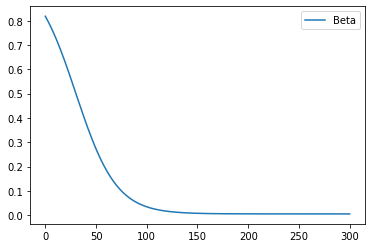

In [19]:
N= 40_000_000
alpha= 0.2
gamma= 0.1
delta = 1/14
rho= 1/21

R_0_start, k, x0, R_0_end = 10, 0.05, 30, 0.05
logistic_R_0 = lambda t: (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

beta = lambda t: logistic_R_0(t) * gamma

E0, I0, R0, D0 = 2, 2, 0, 0
S0 = N-(E0+I0+R0+D0) 

t = np.linspace(0, 300, 300)
y0 = S0, E0, I0, R0, D0

seird_res = odeint(seird, y0, t, args=(N, gamma, beta, delta, rho, alpha))
S, E, I, R, D= seird_res.T

plt.plot(t, beta(t), label='Beta')
plt.legend(loc='upper right')
plt.show()

In [20]:
name = ['Exposed', 'Infected', 'Recovered', 'Death']
data = [go.Scatter(
    x=date_series,
    y=ode,
    name=name[i]
) for i, ode in enumerate([E, I, R, D])]

layout3 = {
    'title':{
        'text': 'SEIRD Model for Coronavirus in Indonesia',
        'x':0.5, #range x axis 0 - 1
    },
    'xaxis':{
        'title': 'Date',
    },
    'yaxis':{
        'title': 'Total Cases',
    },
}

fig = go.Figure(data=data, layout=layout3)
fig.show()

In [21]:
data = go.Scatter(
    x=date_series,
    y=I,
    name='Prediction of Total Infected',
    line={'dash':'dash'}
)

real_data = go.Scatter(
    x=date_series,
    y=df['Kasus Baru'],
    name='Total Infected from kawalcovid.id',
    mode='markers',
    marker={'symbol':'diamond'}
)

layout3 = {
    'title':{
        'text': 'SEIRD Model for Coronavirus in Indonesia',
        'x':0.5, #range x axis 0 - 1
    },
    'xaxis':{
        'title': 'Date',
    },
    'yaxis':{
        'title': 'Total Infected',
        #'range': [-10, 500],
    },
}

fig = go.Figure(data=[data, real_data], layout=layout3)
fig.show()

In [22]:
data = go.Scatter(
    x=date_series[0:120],
    y=I,
    name='Prediction of Total Infected',
    line={
        'dash':'dash'
    }
)

real_data = go.Scatter(
    x=date_series[0:120],
    y=df['Kasus Baru'],
    name='Total Infected from kawalcovid.id',
    mode='markers',
    marker={'symbol':'diamond'}
)

layout3 = {
    'title':{
        'text': 'SEIRD Model for Coronavirus in Indonesia',
        'x':0.5, #range x axis 0 - 1
    },
    'xaxis':{
        'title': 'Date',
        
    },
    'yaxis':{
        'title': 'Total Infected',
        #'range': [-10, 500],
    },
}

fig = go.Figure(data=[data, real_data], layout=layout3)
fig.show()